In [1]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-f64aca41-857e-6fd0-aeab-93522ca9516d)


In [2]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2023-05-20 15:10:31--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.006s  

2023-05-20 15:10:32 (28.6 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



#**Importing time series data with pandas**

In [3]:
import pandas as pd
df=pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
               parse_dates=["Date"],
               index_col=["Date"])
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [5]:
len(df)

2787

In [6]:
bitcoin_price=pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)":"price"})
bitcoin_price.head()

,price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


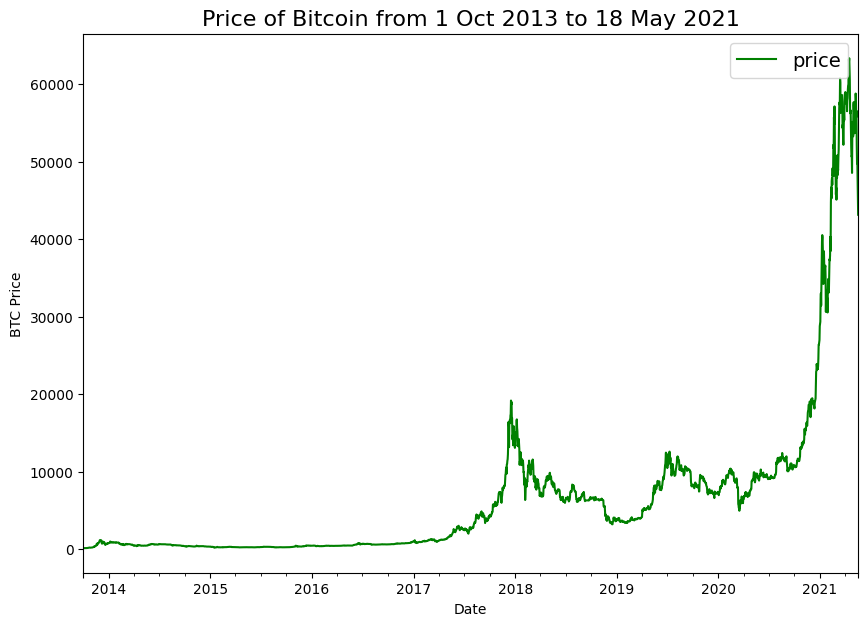

In [7]:
from matplotlib.legend import AnchoredOffsetbox
import matplotlib.pyplot as plt
bitcoin_price.plot(figsize=(10,7),c="g")
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.legend(fontsize=14);

In [8]:
timesteps=bitcoin_price.index.to_numpy()
prices=bitcoin_price.price.to_numpy()

In [9]:
timesteps[:10],prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [10]:
split_size=int(0.8*len(prices))
split_size

2229

##**Spliting Data**

In [11]:
x_train,y_train=timesteps[:split_size],prices[:split_size]
x_test,y_test=timesteps[split_size:],prices[split_size:]

In [12]:
len(x_train),len(x_test),len(y_train),len(y_test)

(2229, 558, 2229, 558)

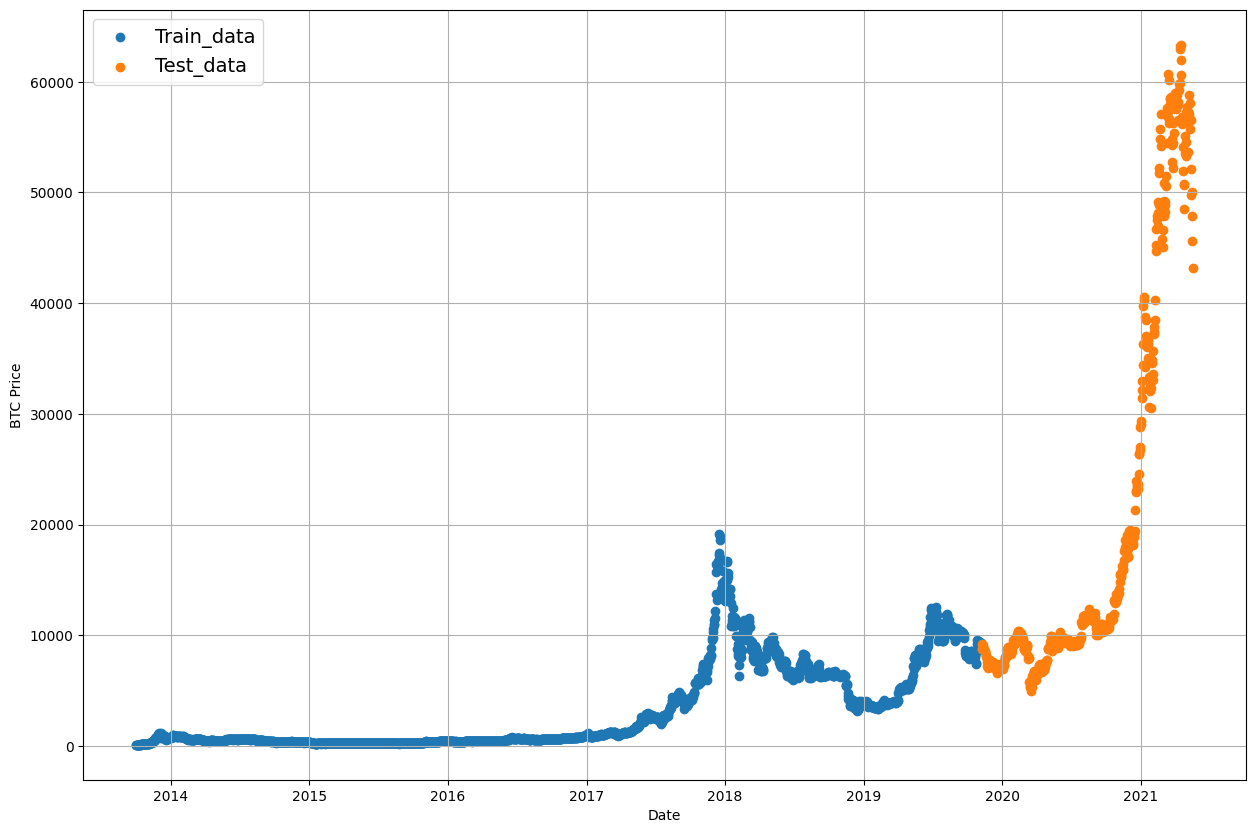

In [13]:
from sqlalchemy import label
plt.figure(figsize=(15,10))
plt.scatter(x_train,y_train,label="Train_data")
plt.scatter(x_test,y_test,label="Test_data")
plt.grid(True)
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

In [14]:

# Create a function to plot time series data
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).
  
  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

#**Modelling Experiments**

##**Model List**
* 0	Naïve model (baseline)
* 1	Dense model	
* 2	Same as 1	
* 3	Same as 1	
* 4	Conv1D	
* 5	LSTM	
* 6	Same as 1 (but with multivariate data)	
* 7	N-BEATs Algorithm	1	7	NA
* 8	Ensemble (multiple models optimized on different loss functions)	
* 9	Future prediction model (model to predict future values)	
* 10	Same as 1 (but with turkey 🦃 data introduced)	


###**0 Naïve model (baseline)**

In [15]:
naive_forecast=y_test[:-1]
naive_forecast[:10],naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

In [16]:
y_test[-10:]

array([58788.20967893, 58102.19142623, 55715.54665129, 56573.5554719 ,
       52147.82118698, 49764.1320816 , 50032.69313676, 47885.62525472,
       45604.61575361, 43144.47129086])

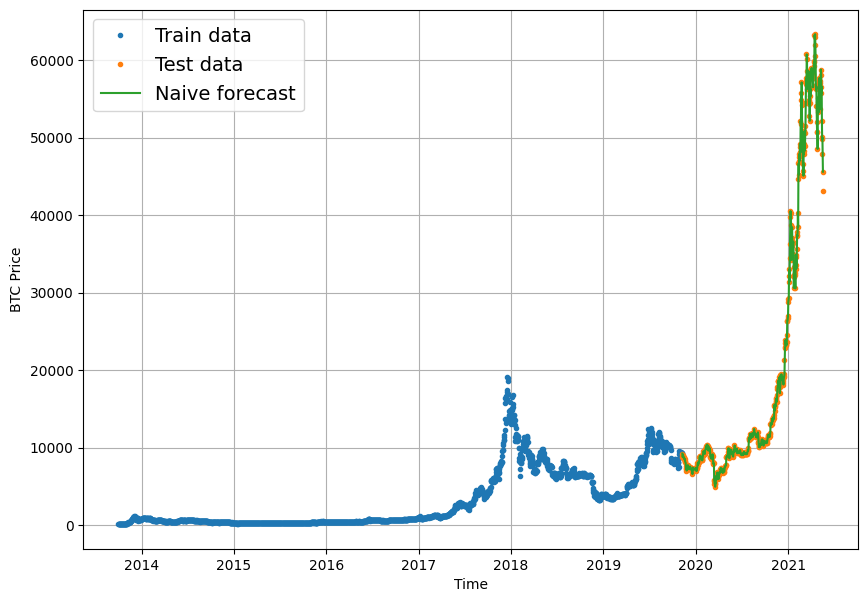

In [17]:
# Plot naive forecast
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=x_train, values=y_train, label="Train data")
plot_time_series(timesteps=x_test, values=y_test, label="Test data")
plot_time_series(timesteps=x_test[1:], values=naive_forecast, format="-", label="Naive forecast");

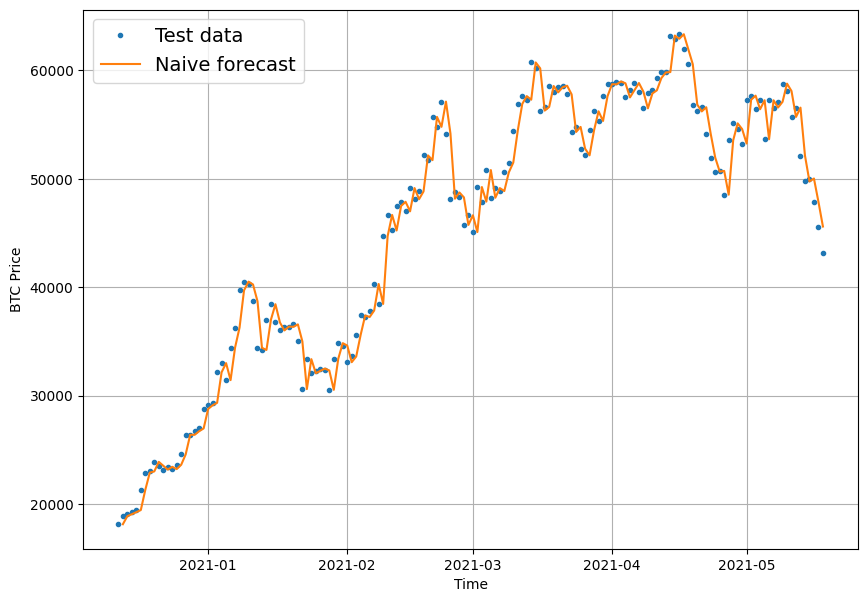

In [18]:

plt.figure(figsize=(10, 7))
offset = 400 # offset the values by 300 timesteps 
plot_time_series(timesteps=x_test, values=y_test, start=offset, label="Test data")
plot_time_series(timesteps=x_test[1:], values=naive_forecast, format="-", start=offset, label="Naive forecast");

In [19]:
import tensorflow as tf
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shifting of 1 day)

  return mae / mae_naive_no_season

In [20]:
mean_absolute_scaled_error(y_test[1:],naive_forecast)

<tf.Tensor: shape=(), dtype=float64, numpy=0.9995699939182624>

In [21]:


def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)
  
  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

####**baseline_model_results**

In [22]:

naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

In [23]:
tf.reduce_mean(y_test)

<tf.Tensor: shape=(), dtype=float64, numpy=20056.632963737222>

In [24]:
WINDOW=7
HORIZON=1

In [25]:
def get_labelled_windows(x,horizon):
  return x[:,:-horizon],x[:,-horizon:]

In [26]:
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0), horizon=HORIZON)
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [1 2 3 4 5 6 7] -> Label: 8


In [27]:
import numpy as np
# Create function to view NumPy arrays as windows 
def make_windows(x, window_size=7, horizon=1):
  """
  Turns a 1D array into a 2D array of sequential windows of window_size.
  """
  # 1. Create a window of specific window_size (add the horizon on the end for later labelling)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  windowed_array = x[window_indexes]

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

In [28]:

full_windows, full_labels = make_windows(prices, window_size=WINDOW, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [29]:
for i in range(4):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]
Window: [118.67466 121.33866 120.65533 121.795   123.033   124.049   125.96116] -> Label: [125.27966]


In [30]:
for i in range(4):
  print(f"Window: {full_windows[i-1]} -> Label: {full_labels[i-1]}")

Window: [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] -> Label: [43144.47129086]
Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]


In [31]:
def train_test_split(windows,labels,test_size=0.2):
  split_size=int(len(windows)*(1-test_size))
  train_windows=windows[:split_size]
  train_labels=labels[:split_size]
  test_windows=windows[split_size:]
  test_labels=labels[split_size:]

  return train_windows,test_windows,train_labels,test_labels
  

In [32]:
train_windows, test_windows, train_labels, test_labels =train_test_split(full_windows,full_labels)

In [33]:
len(train_windows),len(test_windows),len(train_labels),len(test_labels)

(2224, 556, 2224, 556)

###**Making Model Checkpoints**

In [34]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename 
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), # create filepath to save model
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True) # save only the best model to file

###**Model 1: Dense model (window = 7, horizon = 1)**

In [35]:
import absl.logging
absl.logging.set_verbosity(absl.logging.ERROR)

import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# Construct model
model_1 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear") # linear activation is the same as having no activation                        
], name="model_1_dense") # give the model a name so we can save it

# Compile model
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"]) # we don't necessarily need this when the loss function is already MAE

# Fit model
model_1.fit(x=train_windows, # train windows of 7 timesteps of Bitcoin prices
            y=train_labels, # horizon value of 1 (using the previous 7 timesteps to predict next day)
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
18/18 [==============================] - 6s 48ms/step - loss: 2737.8489 - mae: 2737.8489 - val_loss: 5791.1333 - val_mae: 5791.1333
Epoch 2/100
18/18 [==============================] - 1s 32ms/step - loss: 447.0844 - mae: 447.0844 - val_loss: 1532.6729 - val_mae: 1532.6729
Epoch 3/100
18/18 [==============================] - 1s 30ms/step - loss: 277.1130 - mae: 277.1130 - val_loss: 1433.4656 - val_mae: 1433.4656
Epoch 4/100
18/18 [==============================] - 1s 32ms/step - loss: 261.5074 - mae: 261.5074 - val_loss: 1399.6241 - val_mae: 1399.6241
Epoch 5/100
18/18 [==============================] - 1s 30ms/step - loss: 248.1378 - mae: 248.1378 - val_loss: 1377.9684 - val_mae: 1377.9684
Epoch 6/100
18/18 [==============================] - 1s 33ms/step - loss: 249.4502 - mae: 249.4502 - val_loss: 1341.5393 - val_mae: 1341.5393
Epoch 7/100
18/18 [==============================] - 1s 32ms/step - loss: 241.3869 - mae: 241.3869 - val_loss: 1282.1482 - val_mae: 1282.1482
Epoc

In [36]:

# Evaluate model on test data
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 631.2462 - mae: 631.2462


[631.2462158203125, 631.2462158203125]

In [37]:
# Load in saved best performing model_1 and evaluate on test data
model_1 = tf.keras.models.load_model("/content/model_experiments/model_1_dense")
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 564.2741 - mae: 564.2741


[564.2741088867188, 564.2741088867188]

In [38]:
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 564.2741 - mae: 564.2741


[564.2741088867188, 564.2741088867188]

In [39]:
def make_preds(model,input_data):
  forecast=model.predict(input_data)
  return tf.squeeze(forecast)

In [40]:
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

18/18 [==============================] - 0s 2ms/step


(556,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8859.033, 8812.259, 9003.198, 8769.094, 8800.435, 8706.457,
        8668.309, 8564.782, 8451.229, 8524.312], dtype=float32)>)

####**model_1_results**

In [41]:
model_1_results=evaluate_preds(tf.squeeze(test_labels),model_1_preds)
model_1_results

{'mae': 564.27405,
 'mse': 1152947.1,
 'rmse': 1073.7538,
 'mape': 2.5334065,
 'mase': 0.9912732}

In [42]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

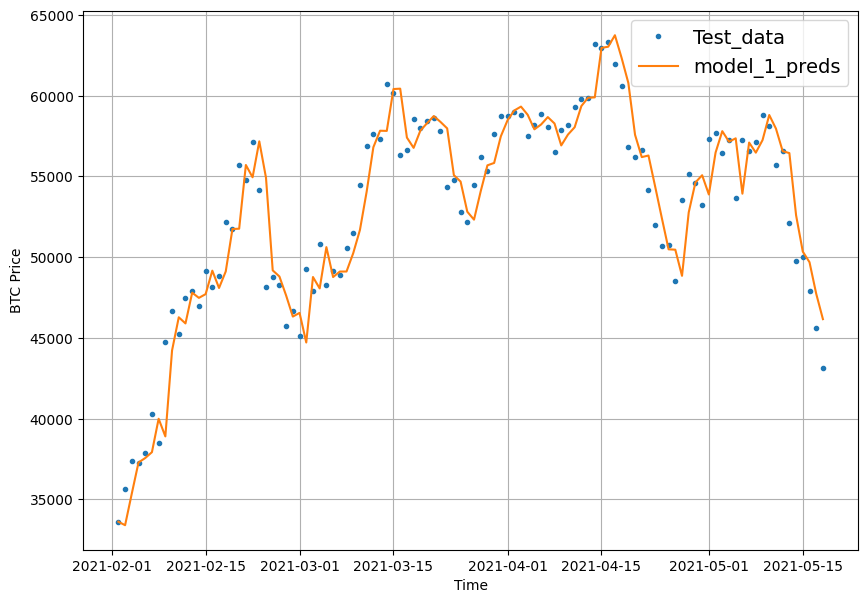

In [43]:
offset = 450
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=x_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=x_test[-len(test_windows):], values=model_1_preds, start=offset, format="-", label="model_1_preds")
     


###**Model 2: Dense (window = 30, horizon = 1)**

---



---



In [44]:
WINDOW=30
HORIZON=1

In [45]:
full_windows,full_labels=make_windows(prices,30,1)
len(full_windows),len(full_labels)

(2757, 2757)

In [46]:
# Make train and testing windows
train_windows, test_windows, train_labels, test_labels = train_test_split(windows=full_windows, labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)
     


(2205, 552, 2205, 552)

In [47]:
tf.random.set_seed(42)

# Create model (same model as model 1 but data input will be different)
model_2 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON) # need to predict horizon number of steps into the future
], name="model_2_dense")

model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

In [48]:
model_2.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 618.0146 - mae: 618.0146


[618.0145874023438, 618.0145874023438]

In [49]:
model_2 = tf.keras.models.load_model("/content/model_experiments/model_2_dense")
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 610.1381 - mae: 610.1381


[610.1381225585938, 610.1381225585938]

In [50]:
model_2_preds = make_preds(model_2, test_windows)
len(model_2_preds), model_2_preds[:10]

18/18 [==============================] - 0s 2ms/step


(552,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8918.372 , 8897.315 , 8791.241 , 8553.886 , 8345.148 , 8315.473 ,
        8189.663 , 8240.781 , 8209.007 , 7638.6533], dtype=float32)>)

####**model_2_results**

In [51]:
model_2_results=evaluate_preds(tf.squeeze(test_labels),model_2_preds)
model_2_results

{'mae': 610.1381,
 'mse': 1256691.4,
 'rmse': 1121.0225,
 'mape': 2.7786732,
 'mase': 1.0665275}

In [52]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

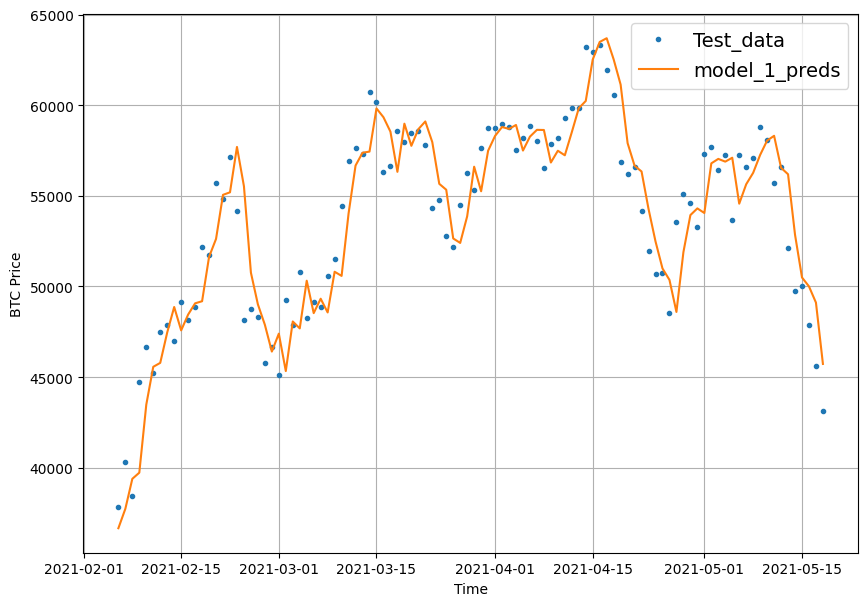

In [53]:
offset = 450
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=x_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=x_test[-len(test_windows):], values=model_2_preds, start=offset, format="-", label="model_1_preds")
     


###**Model 3: Dense (window = 30, horizon = 7)**

---



---



In [54]:
WINDOW=30
HORIZON=7

In [55]:
full_windows,full_labels=make_windows(prices,30,7)
len(full_windows),len(full_labels)

(2751, 2751)

In [56]:
# Make train and testing windows
train_windows, test_windows, train_labels, test_labels = train_test_split(windows=full_windows, labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2200, 551, 2200, 551)

In [57]:
tf.random.set_seed(42)

# Create model (same model as model 1 but data input will be different)
model_3 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON) # need to predict horizon number of steps into the future
], name="model_3_dense")

model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

model_3.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

In [58]:
model_3.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1328.5098 - mae: 1328.5098


[1328.509765625, 1328.509765625]

In [59]:

# Load in best version of model_3 and evaluate
model_3 = tf.keras.models.load_model("model_experiments/model_3_dense")
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 1252.0024 - mae: 1252.0024


[1252.00244140625, 1252.00244140625]

In [60]:
model_3_preds=make_preds(model_3,test_windows)
len(model_3_preds), model_3_preds[:10]

18/18 [==============================] - 0s 2ms/step


(551,
 <tf.Tensor: shape=(10, 7), dtype=float32, numpy=
 array([[9516.442 , 9244.686 , 9266.79  , 9472.903 , 9429.934 , 9347.657 ,
         9475.156 ],
        [9199.978 , 8980.112 , 8997.095 , 9012.022 , 9100.929 , 8992.812 ,
         9157.697 ],
        [8880.318 , 8856.626 , 8776.299 , 8846.542 , 9019.864 , 8886.356 ,
         9039.922 ],
        [8976.797 , 9219.7   , 8937.683 , 9009.28  , 9203.85  , 9047.763 ,
         9087.887 ],
        [8832.872 , 9197.9375, 8770.516 , 9114.745 , 9073.372 , 8992.017 ,
         8884.442 ],
        [8880.292 , 8995.999 , 8781.601 , 9150.312 , 9060.804 , 8888.408 ,
         8824.691 ],
        [8896.624 , 8781.894 , 8769.119 , 8893.954 , 9110.134 , 8572.329 ,
         8722.455 ],
        [8830.616 , 8567.092 , 8555.026 , 8608.961 , 8828.877 , 8268.565 ,
         8583.671 ],
        [8720.503 , 8562.106 , 8503.336 , 8466.982 , 8577.236 , 8108.017 ,
         8371.32  ],
        [8542.448 , 8611.005 , 8357.274 , 8442.763 , 8438.721 , 8177.793 ,
     

####**model_3_results**

In [61]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  if mae.ndim >0: 
    mae=tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)
  
  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [62]:
model_3_results=evaluate_preds(tf.squeeze(test_labels),model_3_preds)
model_3_results

{'mae': 1252.0024,
 'mse': 5434760.0,
 'rmse': 1436.9645,
 'mape': 5.6086025,
 'mase': 2.2278683}

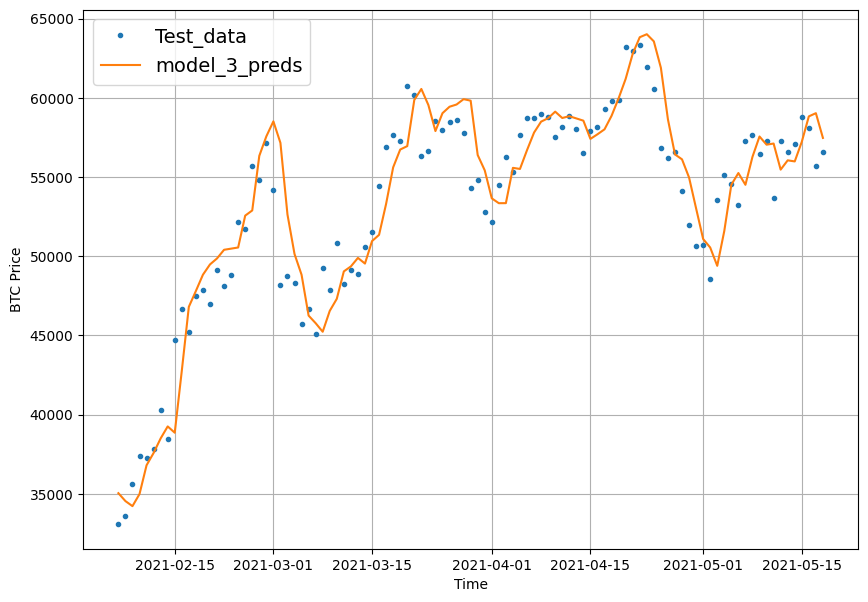

In [63]:
offset = 450
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=x_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=x_test[-len(test_windows):], values=tf.reduce_mean(model_3_preds,axis=1), start=offset, format="-", label="model_3_preds")
     


<Axes: >

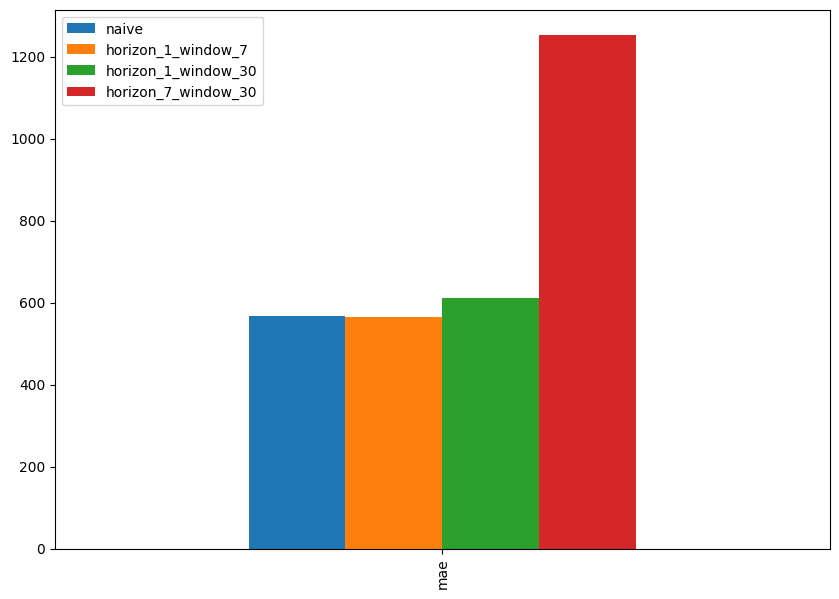

In [64]:
pd.DataFrame({"naive": naive_results["mae"], 
              "horizon_1_window_7": model_1_results["mae"], 
              "horizon_1_window_30": model_2_results["mae"], 
              "horizon_7_window_30": model_3_results["mae"]},index=["mae"]).plot(figsize=(10,7),kind="bar")

###**Model 4: Conv1D**

In [65]:
WINDOW=7
HORIZON=1

In [66]:
full_windows,full_labels=make_windows(prices,window_size=WINDOW,horizon=HORIZON)
len(full_windows),len(full_labels)

(2780, 2780)

In [67]:
train_windows,test_windows,train_labels,test_labels=train_test_split(full_windows,full_labels)

In [68]:
len(train_windows),len(test_windows),len(train_labels),len(test_labels)

(2224, 556, 2224, 556)

In [69]:
train_windows[0].shape

(7,)

In [70]:
# Before we pass our data to the Conv1D layer, we have to reshape it in order to make sure it works
x = tf.constant(train_windows[0])
expand_dims_layer=layers.Lambda(lambda x:tf.expand_dims(x,axis=1))
print(f"Original shape: {x.shape}") # (WINDOW_SIZE)
print(f"Expanded shape: {expand_dims_layer(x).shape}") # (WINDOW_SIZE, input_dim) 
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [71]:
tf.random.set_seed(42)

# Create model
model_4 = tf.keras.Sequential([
  # Create Lambda layer to reshape inputs, without this layer, the model will error
  layers.Lambda(lambda x: tf.expand_dims(x, axis=1)), # resize the inputs to adjust for window size / Conv1D 3D input requirements
  layers.Conv1D(filters=128, kernel_size=5, padding="causal", activation="relu"),
  layers.Dense(HORIZON)
], name="model_4_conv1D")

# Compile model
model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit model
model_4.fit( train_windows,
            train_labels,
            batch_size=128, 
            epochs=100,
            verbose=1,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])
     

Epoch 1/100
18/18 [==============================] - 7s 96ms/step - loss: 1943.2927 - val_loss: 2537.9561
Epoch 2/100
18/18 [==============================] - 1s 46ms/step - loss: 314.8440 - val_loss: 1418.9437
Epoch 3/100
18/18 [==============================] - 1s 42ms/step - loss: 217.8332 - val_loss: 1060.4446
Epoch 4/100
18/18 [==============================] - 1s 40ms/step - loss: 188.0323 - val_loss: 1024.2479
Epoch 5/100
18/18 [==============================] - 0s 5ms/step - loss: 183.0656 - val_loss: 1036.6456
Epoch 6/100
18/18 [==============================] - 1s 41ms/step - loss: 178.9683 - val_loss: 1003.2878
Epoch 7/100
18/18 [==============================] - 1s 41ms/step - loss: 177.4721 - val_loss: 988.8280
Epoch 8/100
18/18 [==============================] - 1s 41ms/step - loss: 174.3266 - val_loss: 985.8171
Epoch 9/100
18/18 [==============================] - 1s 40ms/step - loss: 171.4945 - val_loss: 983.8514
Epoch 10/100
18/18 [==============================] - 1s 4

In [72]:
model_4.summary()

Model: "model_4_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [73]:
model_4.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 656.9070


656.906982421875

In [74]:
# Load in best performing Conv1D model and evaluate it on the test data
model_4 = tf.keras.models.load_model("model_experiments/model_4_conv1D")
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 565.3370


565.3370361328125

In [75]:
# Make predictions
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]
     

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8856.907, 8778.806, 9001.561, 8772.088, 8741.933, 8718.641,
       8662.34 , 8534.556, 8442.135, 8512.942], dtype=float32)>

####**model_4_results**

In [76]:
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_results

{'mae': 565.33704,
 'mse': 1161932.5,
 'rmse': 1077.9297,
 'mape': 2.5273752,
 'mase': 0.9931406}

###**Model 5: RNN(LSTM)**

In [77]:
WINDOW=7
HORIZON=1

In [78]:
from ast import Name
#create RNN model

tf.random.set_seed(42)
inputs=tf.keras.Input(shape=(WINDOW,))
x=layers.Lambda(lambda x: tf.expand_dims(x,axis=1))(inputs)
x=layers.LSTM(128,activation="relu")(x)
outputs=layers.Dense(HORIZON) (x)

model_5=tf.keras.Model(inputs,outputs,name="model_5_lstm")

# Compile model
model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Seems when saving the model several warnings are appearing: https://github.com/tensorflow/tensorflow/issues/47554 
model_5.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

Epoch 1/100
18/18 [==============================] - 4s 141ms/step - loss: 2570.5154 - val_loss: 12928.5107
Epoch 2/100
18/18 [==============================] - 2s 135ms/step - loss: 1217.7228 - val_loss: 1887.6327
Epoch 3/100
18/18 [==============================] - 2s 129ms/step - loss: 267.6445 - val_loss: 1057.3973
Epoch 4/100
18/18 [==============================] - 2s 105ms/step - loss: 203.8721 - val_loss: 1051.8514
Epoch 5/100
18/18 [==============================] - 0s 8ms/step - loss: 190.7456 - val_loss: 1063.1133
Epoch 6/100
18/18 [==============================] - 2s 131ms/step - loss: 185.1407 - val_loss: 964.0396
Epoch 7/100
18/18 [==============================] - 0s 8ms/step - loss: 178.5453 - val_loss: 1077.9254
Epoch 8/100
18/18 [==============================] - 0s 8ms/step - loss: 180.7625 - val_loss: 1037.1082
Epoch 9/100
18/18 [==============================] - 0s 8ms/step - loss: 178.0095 - val_loss: 1010.1165
Epoch 10/100
18/18 [==============================] 

In [79]:
model_5.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 594.8652


594.865234375

In [80]:
# Load in best performing Conv1D model and evaluate it on the test data
model_5 = tf.keras.models.load_model("model_experiments/model_5_lstm")
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 586.8807


586.8806762695312

In [81]:
# Make predictions
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:10]
     

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8932.149, 8781.832, 8968.48 , 8801.099, 8723.181, 8746.661,
       8695.539, 8521.894, 8474.737, 8505.027], dtype=float32)>

####**model_5_results**

In [82]:
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)
model_5_results

{'mae': 586.8807,
 'mse': 1237668.4,
 'rmse': 1112.5055,
 'mape': 2.632008,
 'mase': 1.0309868}

###**Make a multivariate time series**

In [83]:
bitcoin_price.head()

,price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [84]:
bitcoin_price.tail()

,price
Date,
2021-05-14,49764.132082
2021-05-15,50032.693137
2021-05-16,47885.625255
2021-05-17,45604.615754
2021-05-18,43144.471291


In [85]:


# Block reward values
block_reward_1 = 50 # 3 January 2009 (2009-01-03) - this block reward isn't in our dataset (it starts from 01 October 2013)
block_reward_2 = 25 # 28 November 2012 
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 11 May 2020

# Block reward dates (datetime form of the above date stamps)
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-11")

In [86]:
block_reward_2_days=(block_reward_3_datetime-bitcoin_price.index[0]).days
block_reward_3_days=(block_reward_4_datetime-bitcoin_price.index[0]).days
block_reward_2_days,block_reward_3_days

(1012, 2414)

In [87]:
bitcoin_price_block=bitcoin_price.copy()
bitcoin_price_block["block_reward"]=None

# Set values of block_reward column (it's the last column hence -1 indexing on iloc)
bitcoin_price_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_price_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_price_block.iloc[block_reward_3_days:, -1] = block_reward_4
bitcoin_price_block.head()


,price,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


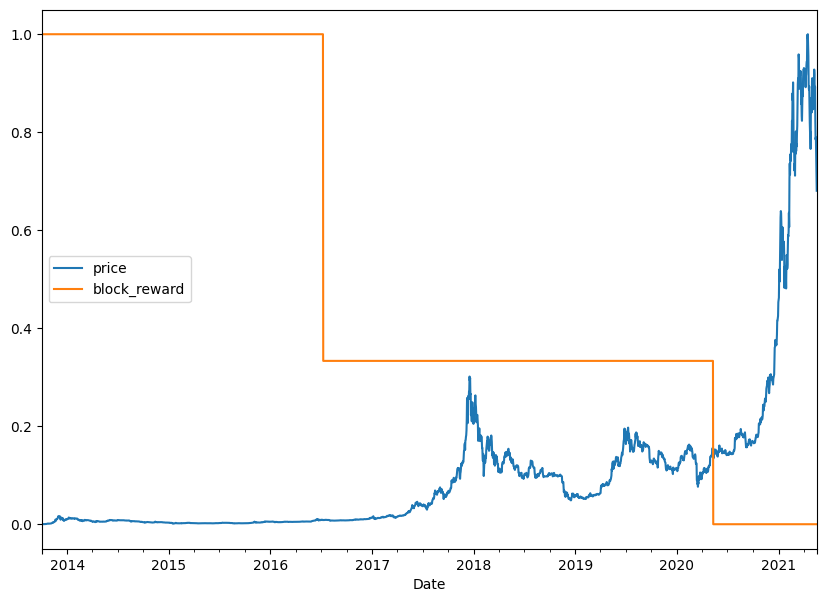

In [88]:
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_price_block[["price", "block_reward"]]), # we need to scale the data first
                                     columns=bitcoin_price_block.columns,
                                     index=bitcoin_price_block.index)
scaled_price_block_df.plot(figsize=(10, 7));

###**Making a windowed dataset with pandas**

In [89]:
WINDOW=7
HORIZON=1

In [90]:
bitcoin_prices_windowed=bitcoin_price_block.copy()
bitcoin_prices_windowed.head()

,price,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


In [91]:
from pandas._libs.tslibs import period
for i in range(WINDOW):
  bitcoin_prices_windowed[f"price{i+1}"]=bitcoin_prices_windowed["price"].shift(periods=i+1)
bitcoin_prices_windowed.head(10)

,price,block_reward,price1,price2,price3,price4,price5,price6,price7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [92]:
X=bitcoin_prices_windowed.dropna().drop("price",axis=1).astype(np.float32)
Y=bitcoin_prices_windowed.dropna()["price"].astype(np.float32)

In [93]:
X.head()

,block_reward,price1,price2,price3,price4,price5,price6,price7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [94]:
Y.head()

Date
2013-10-08    123.032997
2013-10-09    124.049004
2013-10-10    125.961159
2013-10-11    125.279663
2013-10-12    125.927498
Name: price, dtype: float32

In [96]:

# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], Y[:split_size]
X_test, y_test = X[split_size:], Y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

###**Model 6: Dense (multivariate time series)**

In [97]:
tf.random.set_seed(42)
model_6=tf.keras.Sequential([
    layers.Dense(128,activation="relu"),
    layers.Dense(128,activation="relu"),
    layers.Dense(HORIZON)
],name="model_6_Dense_Multivariate")

# Compile
model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_6.fit(X_train, y_train,
            epochs=100,
            batch_size=128,
            verbose=1, # only print 1 line per epoch
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])

Epoch 1/100
18/18 [==============================] - 2s 47ms/step - loss: 1261.5132 - val_loss: 1093.4198
Epoch 2/100
18/18 [==============================] - 1s 38ms/step - loss: 300.7934 - val_loss: 992.4856
Epoch 3/100
18/18 [==============================] - 0s 5ms/step - loss: 201.2206 - val_loss: 1382.5742
Epoch 4/100
18/18 [==============================] - 1s 36ms/step - loss: 179.0082 - val_loss: 907.2707
Epoch 5/100
18/18 [==============================] - 1s 37ms/step - loss: 157.9698 - val_loss: 870.4998
Epoch 6/100
18/18 [==============================] - 0s 6ms/step - loss: 150.6700 - val_loss: 870.7584
Epoch 7/100
18/18 [==============================] - 1s 46ms/step - loss: 144.7043 - val_loss: 820.3788
Epoch 8/100
18/18 [==============================] - 1s 53ms/step - loss: 135.2808 - val_loss: 727.7751
Epoch 9/100
18/18 [==============================] - 0s 8ms/step - loss: 130.6594 - val_loss: 794.5684
Epoch 10/100
18/18 [==============================] - 0s 8ms/ste

In [98]:
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 587.0089


587.0089111328125

In [99]:

# Make sure best model is loaded and evaluate
model_6 = tf.keras.models.load_model("model_experiments/model_6_Dense_Multivariate")
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 566.7731


566.7730712890625

In [100]:

# Make predictions on multivariate data
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]
     

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8814.874, 8771.314, 9049.793, 8752.359, 8727.851, 8729.919,
       8670.629, 8506.097, 8443.686, 8529.234], dtype=float32)>

####**model_6_results**

In [101]:
model_6_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_6_preds)
model_6_results

{'mae': 566.77313,
 'mse': 1162005.5,
 'rmse': 1077.9636,
 'mape': 2.5521677,
 'mase': 0.9956634}

In [102]:
model_1_results

{'mae': 564.27405,
 'mse': 1152947.1,
 'rmse': 1073.7538,
 'mape': 2.5334065,
 'mase': 0.9912732}